In [1]:
!pip install "reverse_geocoder"
!pip install "geopy"

#19242 Ozgur Guneshan
    


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import reverse_geocoder as rg
from geopy.distance import geodesic
import datetime 
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("/Users/Ozgur/Desktop/cs210/taxi-trips.csv")
 #Creating tuple list for pick up coordinates
#df = pd.read_csv("taxi-trips.csv")


In [4]:
pick_search_result = rg.search(list(zip(df["pickup_latitude"], df["pickup_longitude"])))
drop_search_result = rg.search(list(zip(df["dropoff_latitude"], df["dropoff_longitude"])))

pick_list=list(zip(df["pickup_latitude"], df["pickup_longitude"]))
drop_list=list(zip(df["dropoff_latitude"], df["dropoff_longitude"]))

Loading formatted geocoded file...


In [5]:
pick_names = []
drop_names = []
for p in pick_search_result:
    pick_names.append(p["name"])
for d in drop_search_result:
    drop_names.append(d["name"])

In [6]:
df["pickup_district"] = pick_names
df["dropoff_district"] = drop_names

In [7]:
df['pickup_district'].value_counts().head(5)

Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: pickup_district, dtype: int64

In [8]:
df['dropoff_district'].value_counts().head(5)

Manhattan           44478
New York City       31082
Long Island City    19919
Weehawken           10621
Brooklyn             2059
Name: dropoff_district, dtype: int64

In [9]:
distances = list()
for i in range(0,len(pick_list)):
    distances.append(geodesic(pick_list[i], drop_list[i]).miles)

In [10]:
df["distance"] = distances
df['npickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df.head(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,npickup_datetime
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.96463,40.765602,N,455,Manhattan,Manhattan,0.933406,2016-03-14 17:24:55
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.97300,40.789989,N,1225,Long Island City,Manhattan,3.178194,2016-03-10 21:45:01
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.97850,40.756191,N,526,Weehawken,Manhattan,0.928961,2016-03-11 07:11:23


In [11]:
def assign_time_of_day(row): # assigning time slot according to the date
    h=row['npickup_datetime'].hour
    
    if h >= 7 and h < 9:
        return "rush_hour_morning"
    elif h >= 9 and h < 16:
        return "afternoon"
    elif h >= 16 and h < 18:
        return "rush_hour_evening"
    elif h >= 18 and h < 23:
        return "evening"
    else:
        return "late_night"

In [12]:
df["time_of_day"] = df.apply(assign_time_of_day,axis=1)

In [13]:
df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,npickup_datetime,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.96463,40.765602,N,455,Manhattan,Manhattan,0.933406,2016-03-14 17:24:55,rush_hour_evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.97300,40.789989,N,1225,Long Island City,Manhattan,3.178194,2016-03-10 21:45:01,evening


In [15]:
df_steam=df.groupby(by="time_of_day").mean()
df_steam["distance"]


time_of_day
afternoon            1.932456
evening              2.099076
late_night           2.558580
rush_hour_evening    2.077128
rush_hour_morning    1.943823
Name: distance, dtype: float64

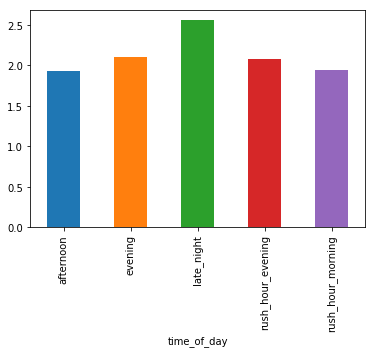

In [22]:

df_steam["distance"].plot(kind="bar")


In [23]:

df_steam["distance"] # distances for the time slots


time_of_day
afternoon            1.932456
evening              2.099076
late_night           2.558580
rush_hour_evening    2.077128
rush_hour_morning    1.943823
Name: distance, dtype: float64

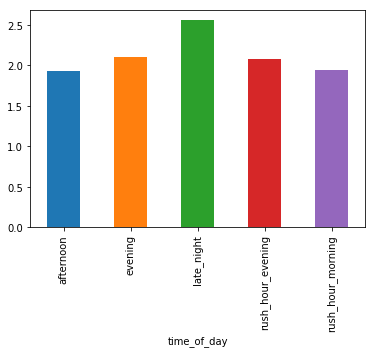

In [18]:
df_steam["distance"].plot(kind="bar")

In [19]:


from scipy import stats
sample1=df[df['passenger_count']==1]['distance']
sample2=df[df['passenger_count']>=2]['distance']
stats.ttest_ind(sample1, sample2, equal_var=False)  # since we have not equal variances 

# we reject the null hypothesis

Ttest_indResult(statistic=-4.903362110492165, pvalue=9.445117080448936e-07)

In [20]:
sample1=df[df['passenger_count']<=2]['distance']
sample2=df[df['passenger_count']>=3]['distance']
stats.ttest_ind(sample1, sample2, equal_var=False)  # since we have not equal variances 
# we accept the null hypothesis because of the p value

Ttest_indResult(statistic=-0.6178759383153076, pvalue=0.5366631280534486)

In [21]:
sample1=df[df['passenger_count']<=3]['distance']
sample2=df[df['passenger_count']>=4]['distance']
stats.ttest_ind(sample1, sample2, equal_var=False)  # since we have not equal variances
# we accept the null hypothesis because of the p value
# group size effect the distance for more than 2 people groups

Ttest_indResult(statistic=-0.48909584504200465, pvalue=0.6247807078495868)

In [22]:
# our 

In [23]:
df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,npickup_datetime,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.96463,40.765602,N,455,Manhattan,Manhattan,0.933406,2016-03-14 17:24:55,rush_hour_evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.97300,40.789989,N,1225,Long Island City,Manhattan,3.178194,2016-03-10 21:45:01,evening


In [26]:
df['Day_name']=df['npickup_datetime'].dt.weekday_name # getting day names

In [27]:
df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,npickup_datetime,time_of_day,Day_name
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.96463,40.765602,N,455,Manhattan,Manhattan,0.933406,2016-03-14 17:24:55,rush_hour_evening,Monday
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.97300,40.789989,N,1225,Long Island City,Manhattan,3.178194,2016-03-10 21:45:01,evening,Thursday


In [28]:
weekdays=df[df['Day_name'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])]["distance"]
weekends=df[df['Day_name'].isin(['Saturday','Sunday'])]["distance"]


In [29]:
stats.ttest_ind(weekends, weekdays, equal_var=False)  # since we have not equal variances
# statistic value is positive and pvalue is less than 0.05 we reject the null hypothesis
#usage of taxi is more in weekends

Ttest_indResult(statistic=5.604877366928294, pvalue=2.0924144330730978e-08)

In [28]:
print(weekdays.mean())
print(weekends.mean())

2.085996657618846
2.171994885975762
